In [366]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import os
import Utils as utils
import time
import gc
%matplotlib inline

In [337]:
y_test = np.load('DataSet/v1_64/Training/y_train.npy')

In [338]:
y_real = []
for test in y_test:
    y_real.append(np.where(test==1)[0][0])

In [361]:
modelo = load_model('Modelos/Modelo-3e-05-10-200.h5')

In [364]:
def get_predictions(list_videos):
    predictions = []
    times = []
    for video in list_videos:
        inicio = time.time()
        prediction = np.argmax(modelo.predict(video.reshape(1,64,50,50,3)))
        fin = time.time()
        times.append(fin-inicio)
        predictions.append(prediction)
    return predictions, times

In [368]:
list_videos = np.load('DataSet/v1_64/Training/x_train.npy')
y_pred, time_list = get_predictions(list_videos)

In [369]:
names = [str(x) for x in range(20)]

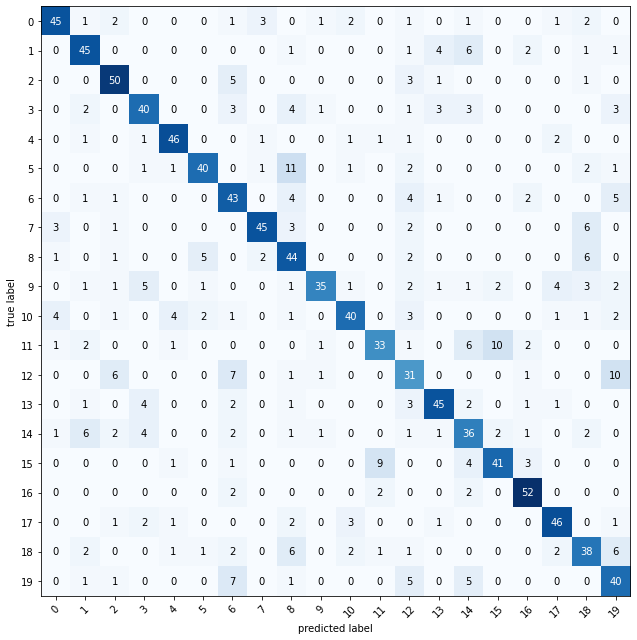

In [380]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [381]:
print(metrics.classification_report(y_real,y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.818     0.750     0.783        60
           1      0.714     0.738     0.726        61
           2      0.746     0.833     0.787        60
           3      0.702     0.667     0.684        60
           4      0.836     0.852     0.844        54
           5      0.816     0.667     0.734        60
           6      0.566     0.705     0.628        61
           7      0.865     0.750     0.804        60
           8      0.543     0.721     0.620        61
           9      0.875     0.583     0.700        60
          10      0.800     0.667     0.727        60
          11      0.717     0.579     0.641        57
          12      0.484     0.544     0.512        57
          13      0.789     0.750     0.769        60
          14      0.545     0.600     0.571        60
          15      0.745     0.695     0.719        59
          16      0.812     0.897     0.852        58
          17      0.807    

In [379]:
y_pred[1153] = 14

In [374]:
y_pred[1147:1180]

[19,
 2,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 12,
 19,
 19,
 19,
 19,
 19,
 19,
 12,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 8]

In [383]:
import statistics
statistics.mean(time_list)

0.05098618974982939